<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II

# Problema desafío: Electrocardiografía para uso clínico



Se pide diseñar un filtro analógico para limitar en banda una señal de electrocardiografía para uso clínico. Para ello se decide que la mejor solución deberá ser un filtro pasabanda de **máxima planicidad**,  que satisfaga la siguiente plantilla:

 * $\omega_{s1}  = 0.2$ Hz
 * $\omega_{p1}  = 2$ Hz
 * $\omega_{p2}  = 35$ Hz
 * $\omega_{s2}  = 50$ Hz
 * $\alpha_{max}  = 1$ dB
 * $\alpha_{min1}  = 34$ dB
 * $\alpha_{min2}  =$ sin restricción



Pasabanda normalizado
---------------------


<IPython.core.display.Math object>

(1,
 array([<Axes: title={'center': 'Magnitude response'}, ylabel='Magnitude [dB]'>,
        <Axes: title={'center': 'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [rad]'>],
       dtype=object))

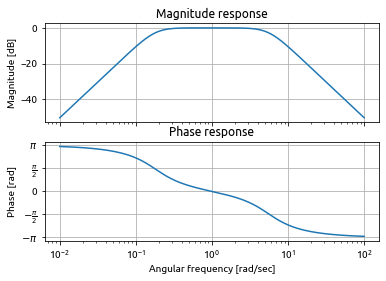

In [1]:
# Módulos para Jupyter

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

# un módulo adaptado a mis necesidades
from pytc2.sistemas_lineales import bodePlot, pretty_print_lti



#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

# módulo de SciPy
from scipy import signal as sig


#############################################
## A partir de aquí incluya su simulación  ##
#############################################

nn = 2 # orden
ripple = 1 # dB

eps = np.sqrt(10**(ripple/10)-1)

# Diseño un Butter.
z,p,k = sig.buttap(nn)
num_lp, den_lp = sig.zpk2tf(z,p,k)

# paso de un Butter. a maxima planicidad si eps != 1
num_lp_butter, den_lp_butter = sig.lp2lp(num_lp,den_lp, eps**(-1/nn) )

# obtengo la transferencia normalizada del pasabanda
num_bp_n, den_bp_n = sig.lp2bp(num_lp_butter,den_lp_butter, wo=1, bw=1/.253)

# obtengo la transferencia desnormalizada del pasabanda
num_bp, den_bp = sig.lp2bp(num_lp_butter,den_lp_butter, wo=8.367, bw=33)

# Averiguo los polos y ceros
z_bp_n, p_bp_n, k_bp_n = sig.tf2zpk(num_bp_n, den_bp_n)

str_aux = 'Pasabanda normalizado'
print( str_aux )
print( '-' * len(str_aux) )

this_lti = sig.TransferFunction(num_bp_n, den_bp_n)
pretty_print_lti(this_lti)
print( '\n\n')

# visualizo el modelo matemático normalizado
bodePlot(sig.TransferFunction(num_bp_n,den_bp_n))


# Factorización de la transferencia BP - BP

Section 0
---------


<IPython.core.display.Math object>




Section 1
---------


<IPython.core.display.Math object>

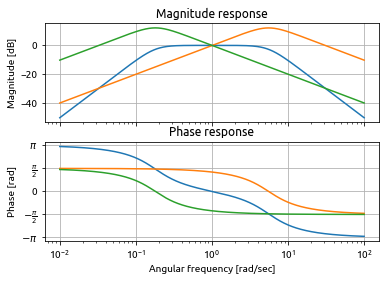

In [4]:
fig_id = 1
_, axes_hdl = bodePlot(sig.TransferFunction(num_bp_n,den_bp_n), label = 'Total', fig_id=fig_id )

this_k = k_bp_n
this_z = z_bp_n[0]
this_p = p_bp_n[0:2]
bodePlot(sig.TransferFunction(sig.lti(this_z,this_p,this_k)), label = 'Sect {:d}'.format(0), fig_id=fig_id, axes_hdl=axes_hdl )

str_aux = 'Section {:d}'.format(0)
print( str_aux )
print( '-' * len(str_aux) )

this_lti = sig.TransferFunction(sig.lti(this_z,this_p,this_k))
pretty_print_lti(this_lti)
print( '\n\n')

for ii in np.arange(1, p_bp_n.shape[0]/2, dtype='int'):
    
    this_k = 1
    this_z = z_bp_n[ii]
    this_p = p_bp_n[ii*2:ii*2+2]
    this_lti = sig.TransferFunction(sig.lti(this_z,this_p,this_k))

    str_aux = 'Section {:d}'.format(ii)
    print( str_aux )
    print( '-' * len(str_aux) )
    
    pretty_print_lti(this_lti)

    print( '\n\n')
    
    bodePlot(this_lti, label = 'Sect {:d}'.format(ii), fig_id=fig_id, axes_hdl=axes_hdl )
    


# Factorización de la transferencia LP - HP

In [5]:
fig_id = 2
_, axes_hdl = bodePlot(sig.TransferFunction(num_bp_n,den_bp_n), label = 'Total', fig_id=fig_id )

this_k = k_bp_n
this_z = z_bp_n
this_p = p_bp_n[0:2]
bodePlot(sig.TransferFunction(sig.lti(this_z,this_p,this_k)), label = 'HP', fig_id=fig_id, axes_hdl=axes_hdl )

str_aux = 'Section HP'
print( str_aux )
print( '-' * len(str_aux) )

this_lti = sig.TransferFunction(sig.lti(this_z,this_p,this_k))
pretty_print_lti(this_lti)
print( '\n\n')

for ii in np.arange(1, p_bp_n.shape[0]/2, dtype='int'):
    
    this_k = 1
    this_z = []
    this_p = p_bp_n[ii*2:ii*2+2]
    this_lti = sig.TransferFunction(sig.lti(this_z,this_p,this_k))

    str_aux = 'Section LP'
    print( str_aux )
    print( '-' * len(str_aux) )
    
    pretty_print_lti(this_lti)

    print( '\n\n')
    
    bodePlot(this_lti, label = 'LP', fig_id=fig_id, axes_hdl=axes_hdl )

    


TypeError: bodePlot() got an unexpected keyword argument 'label'